# Part-of-Speech (POS) Tagging

In [1]:
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
from nltk.help import upenn_tagset

In [3]:
upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Defintion of toy dataset

We can simply use the examples sentence from the Tokenization tutorial.

In [4]:
sentences = ["Text processing with Python is great.", 
             "It isn't (very) complicated to get started.",
             "However,careful to...you know....avoid mistakes.",
             "This is so cooool #nltkrocks :))) :-P <3."]

## Processing of sentences

Since we know that there a lot of informal tokens in the sentences, we can the TweetTokenizer. For any kind of more formal text, the default tokenizer will work just find. Even here, the default tokenizer would suffice since the important token (i.e., the "real" words) are handled correctly.

In [5]:
tweet_tokenizer = TweetTokenizer()

The procrssing itself is just two steps: tokenizing and POS tagging, both provided by available methods. Note that the method `pos_tag()` expects as input a list (of tokens/words) and not a string.

In [6]:
print ('\nOutput of NLTK POS tagger:')
for s in sentences:
    token_list = tweet_tokenizer.tokenize(s)
    pos_tag_list = pos_tag(token_list)
    print ('\n', pos_tag_list)


Output of NLTK POS tagger:

 [('Text', 'NN'), ('processing', 'NN'), ('with', 'IN'), ('Python', 'NNP'), ('is', 'VBZ'), ('great', 'JJ'), ('.', '.')]

 [('It', 'PRP'), ("isn't", 'VBZ'), ('(', '('), ('very', 'RB'), (')', ')'), ('complicated', 'VBD'), ('to', 'TO'), ('get', 'VB'), ('started', 'VBN'), ('.', '.')]

 [('However', 'RB'), (',', ','), ('careful', 'JJ'), ('to', 'TO'), ('...', ':'), ('you', 'PRP'), ('know', 'VBP'), ('...', ':'), ('avoid', 'JJ'), ('mistakes', 'NNS'), ('.', '.')]

 [('This', 'DT'), ('is', 'VBZ'), ('so', 'RB'), ('cooool', 'JJ'), ('#nltkrocks', 'NNS'), (':)', 'VBP'), (')', ')'), (')', ')'), (':-P', 'JJ'), ('<3', 'NN'), ('.', '.')]


## POS tagging with spaCy

In [7]:
import spacy

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
print ('\nOutput of spaCy POS tagger:')
for s in sentences:
    doc = nlp(s) # doc is an object, not just a simple list
    # Let's create a list so the output matches the previous ones
    token_list = []
    for token in doc:
        token_list.append((token.text, token.tag_)) # token is also an object, not a string
    print ('\n', token_list)


Output of spaCy POS tagger:

 [('Text', 'NN'), ('processing', 'NN'), ('with', 'IN'), ('Python', 'NNP'), ('is', 'VBZ'), ('great', 'JJ'), ('.', '.')]

 [('It', 'PRP'), ('is', 'VBZ'), ("n't", 'RB'), ('(', '-LRB-'), ('very', 'RB'), (')', '-RRB-'), ('complicated', 'JJ'), ('to', 'TO'), ('get', 'VB'), ('started', 'VBN'), ('.', '.')]

 [('However', 'RB'), (',', ','), ('careful', 'JJ'), ('to', 'TO'), ('...', 'NFP'), ('you', 'PRP'), ('know', 'VBP'), ('....', 'NFP'), ('avoid', 'VB'), ('mistakes', 'NNS'), ('.', '.')]

 [('This', 'DT'), ('is', 'VBZ'), ('so', 'RB'), ('cooool', 'JJ'), ('#', '$'), ('nltkrocks', 'NNS'), (':)))', ':'), (':-P', 'NFP'), ('<3', 'ADD'), ('.', '.')]


The results of the NLTK and spaCy POS tagger are not exactly the same. The reasons is that the two packages use different tokenizers but also different models to POS tag the tokens; see particularly the emoticons. In most cases, this doesn't matter, since "normal words" are mostly tagged correctly across different POS taggers.

## Application use case: analysis of restaurant reviews

Knowing the POS tags of tokens/words is useful for various subsequent analyses. In the following example, we want to analyze 1,000 Yelp reviews about the restaurant "Mon Ami Gabi" in Las Vegas (USA) to see which adjectives are most commonly used.

- Link to restaurant on Yelp: https://www.yelp.com/biz/mon-ami-gabi-las-vegas-2

### Load reviews from CSV file

`pandas` is a very popular package for handling structured files like CSV files.

In [10]:
import pandas as pd

`pandas` use the notion of *data frames* (df) to denote data objects

In [14]:
df = pd.read_csv('data/reviews/yelp-reviews-mon-ami-gabi.csv')

df.head()

,review_number,review
0,1,"Excellent food, great atmosphere, a bit noisy...."
1,2,If you enjoy a little people watching with you...
2,3,"affordable, fairly classic french foodsit outs..."
3,4,Though heartbroken and a bit aimless on my 22n...
4,5,"The food and wine was amazing, but the super h..."


The CSV file with the reviews and thus the data frame have two columns: the review number and the text of the review. Since we're only interested in the review texts, we can simply extract them into a list of strings.

In [15]:
reviews = df['review'].tolist() # "review" is the name of the column of interest (see above)

### Review analysis

For each review, we perform the following steps:
- Tokenize review and POS tag all token
- Check each token if it is an adjective
- If a token is an adjetive, increase a counter for this adjective

In [16]:
# This dictionary will keep track of the count for each found adjective
adjective_frequencies = {}

# Check each review on by one
for review in reviews:
    # Tokenize the review
    token_list = tweet_tokenizer.tokenize(review)
    # POS tag all words/tokens
    pos_tag_list = pos_tag(token_list)
    # Count the number of all adjectives
    for token, tag in pos_tag_list:
        if tag[0].lower() != 'j':
            # Ignore token if it is not an adjective (recall that JJ, JJR, JJS indicate adjectives)
            continue
        # Convert token to lowercase, otherwise "Good" and "good" are considered differently
        token = token.lower()
        if token not in adjective_frequencies:
            adjective_frequencies[token] = 1.0
        else:
            adjective_frequencies[token] = adjective_frequencies[token] + 1.0

            
# We need to convert the dictionary to a list of tuples for the word cloud generation                
# Before: {"small": 45, "nice": 30, "good": 102, ...}
# After:  [("small", 45), ("nice", 30), ("good", 102), ...]
adjective_frequencies = [ (token, count) for token, count in adjective_frequencies.items() ]                
            
    
# Show the first 5 (word,count) tuples (not sorted because not needed)
#print (adjective_frequencies[:5])

In [18]:
len(adjective_frequencies)

2150

### Visualization of results

We use a readily available Python package (`wordcloud`) for convenience

In [17]:
from utils.plotutil import show_wordcloud

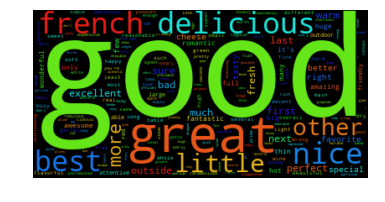

In [18]:
show_wordcloud(adjective_frequencies)